In [11]:
#imports
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt

Creating State Space Systems

In [13]:
#Just enter them as matrices, use np.matrix()

a = np.matrix(""" 0       1      0   ;
                 -0.0071 -0.111  0.12;
                  0       0.07  -0.3""")
b = np.matrix(""" 0 ;    -0.095; 0.072""")
c = np.matrix(""" 1       0     0    """)
d = np.matrix(""" 0     """)

#Then create the system with ss

sys = ss(a, b, c, d)
print(sys)



<LinearIOSystem>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ 0.      1.      0.    ]
     [-0.0071 -0.111   0.12  ]
     [ 0.      0.07   -0.3   ]]

B = [[ 0.   ]
     [-0.095]
     [ 0.072]]

C = [[1. 0. 0.]]

D = [[0.]]



Simple Operations with State Space

In [14]:

#The function rss is a nice one, it gives you a random state-space system, for practice.
#The first parameter is the number of state, second parameter number of outputs, and the third parameter is the number inputs.

#If you have two state-space systems, you can connect them in series if the number of outputs of the first system matches the number of inputs of the second system.
s1 = rss(3, 1, 2)
s2 = rss(2, 3, 1)
stotal = s2 * s1

#If you have two state-space systems in parallel, you can connect them by adding them up, The number of inputs and the number of outputs must be equal. 
s1 = rss(3, 1, 2)
s2 = rss(2, 1, 2)
stotal = s1 + s2


One of the most common feedback operations is selecting one of the outputs and feeding these back with a gain. Say we have a system with one input and four outputs, like the one given below. That system represents the motions of a submarine. Its three states are θ, q and α (just like with an aircraft). The state-space system has four outputs, the three aforementioned states and the "flight/float" path angle γ.


In [15]:
a = np.matrix('''0 1 0 ;

-0.0071 -0.111 0.12;

0 0.07 -0.3''')

b = np.matrix(''' 0 ; -0.095; 0.072''')

c = np.matrix(''' 1.0 0 0;

0 1 0;

0 0 1;

1 0 -1''')

d = np.zeros((4, 1))

sys2 = ss(a, b, c, d)

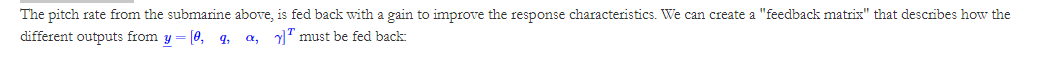

In [16]:
k = np.matrix( '0  -0.67 0  0')
sysclosed = sys2.feedback(k)